In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Generate Dataset
np.random.seed(42)
samples = 1440  # 10 days × 24 hrs × 6 intervals/hour
timestamps = pd.date_range(start='2025-01-01', periods=samples, freq='10min')

temperature = np.clip(np.random.normal(loc=2, scale=1.5, size=samples), -2, 6)
humidity = np.clip(np.random.normal(loc=70, scale=8, size=samples), 55, 85)
engine_load = np.clip(np.random.normal(loc=7, scale=3, size=samples), 0, 15)


In [3]:
# Hysteresis-Based Status Logic Define
def hysteresis(temp, load, prev):
    if temp >= 4 and load >= 5:
        return 1
    elif temp <= -1:
        return 0
    else:
        return prev

status = []
prev_state = 0
for t, l in zip(temperature, engine_load):
    state = hysteresis(t, l, prev_state)
    status.append(state)
    prev_state = state


In [4]:
# DataFrame Building
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperature,
    'Humidity': humidity,
    'Engine_Load': engine_load,
    'Refrigeration_Status': status
})
df.head()

,Timestamp,Temperature,Humidity,Engine_Load,Refrigeration_Status
0,2025-01-01 00:00:00,2.745071,75.303050,0.285306,0
1,2025-01-01 00:10:00,1.792604,79.387791,0.637900,0
2,2025-01-01 00:20:00,2.971533,71.448172,5.179404,0
3,2025-01-01 00:30:00,4.284545,59.625344,8.373060,1
4,2025-01-01 00:40:00,1.648770,73.197504,0.000000,1


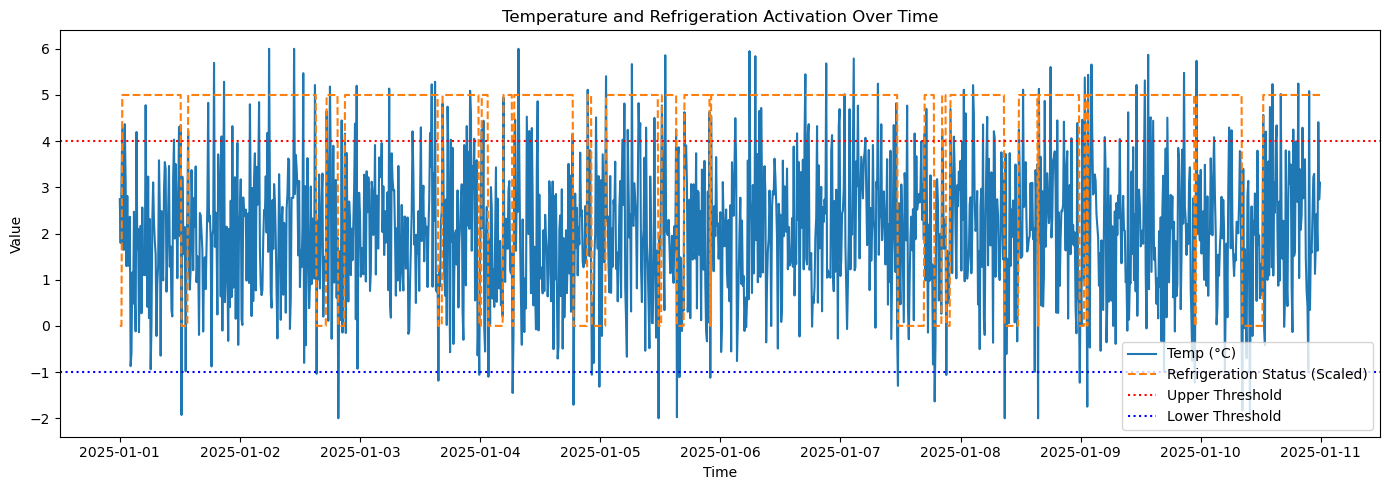

In [5]:
#Graph - Temperature & Status Over Time
plt.figure(figsize=(14,5))
plt.plot(df['Timestamp'], df['Temperature'], label="Temp (°C)")
plt.plot(df['Timestamp'], df['Refrigeration_Status']*5, label="Refrigeration Status (Scaled)", linestyle='--')
plt.axhline(4, color='red', linestyle=':', label="Upper Threshold")
plt.axhline(-1, color='blue', linestyle=':', label="Lower Threshold")
plt.title("Temperature and Refrigeration Activation Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# Machine Learning Model Training - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['Temperature', 'Engine_Load']]
y = df['Refrigeration_Status']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [12]:
#SVM Classifier Training
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]


In [15]:
#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8634259259259259
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.86      1.00      0.93       373

    accuracy                           0.86       432
   macro avg       0.43      0.50      0.46       432
weighted avg       0.75      0.86      0.80       432

ROC AUC: 0.5108829008951696


\\apporto.com\dfs\YSJ\Users\mohamedmohamed2_ysj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
\\apporto.com\dfs\YSJ\Users\mohamedmohamed2_ysj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
\\apporto.com\dfs\YSJ\Users\mohamedmohamed2_ysj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

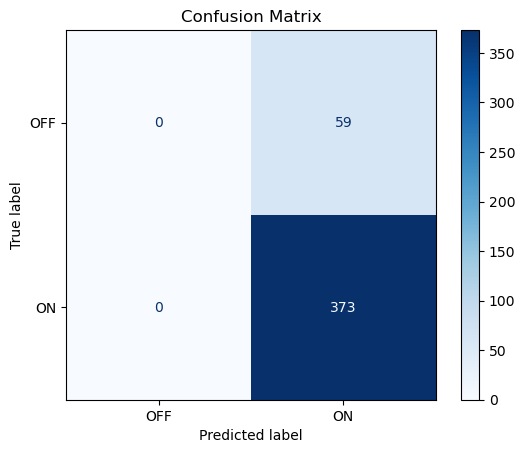

In [17]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['OFF', 'ON'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

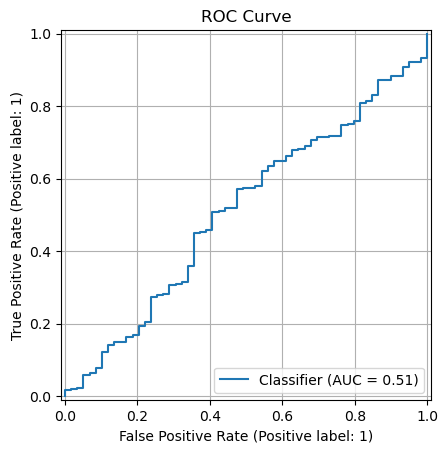

In [67]:
#ROC curve 
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [69]:
#Temperature Range Compliance Evaluation
within_range = ((df['Temperature'] >= -1) & (df['Temperature'] <= 4)).sum()
percent_in_range = 100 * within_range / len(df)
print(f"Temperature in target range: {percent_in_range:.2f}%")


Temperature in target range: 88.12%


In [71]:
#Compressor Runtime
on_minutes = df['Refrigeration_Status'].sum() * 10
hours_on = on_minutes / 60
print(f"Total compressor time: {hours_on:.2f} hours over 10 days")


Total compressor time: 205.83 hours over 10 days


In [73]:
df.to_csv("fish_cold_storage_simulated_data.csv", index=False)

In [75]:
import pandas as pd
import numpy as np

np.random.seed(42)
samples = 1440
timestamps = pd.date_range(start='2025-01-01', periods=samples, freq='10min')
temperature = np.clip(np.random.normal(loc=2, scale=1.5, size=samples), -2, 6)
engine_load = np.clip(np.random.normal(loc=7, scale=3, size=samples), 0, 15)

def hysteresis(temp, load, prev_state):
    if temp >= 4 and load >= 5:
        return 1
    elif temp <= -1:
        return 0
    else:
        return prev_state

status_hysteresis = []
prev_state = 0
for t, l in zip(temperature, engine_load):
    current_state = hysteresis(t, l, prev_state)
    status_hysteresis.append(current_state)
    prev_state = current_state

status_rule_based = [(1 if t >= 4 and l >= 5 else 0) for t, l in zip(temperature, engine_load)]

df_sim = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperature,
    'Engine_Load': engine_load,
    'Hysteresis_Status': status_hysteresis,
    'Rule_Based_Status': status_rule_based
})


In [77]:
# Naive rule-based logic: ON when temperature ≥ 4°C, else OFF
df_sim['Naive_Status'] = (df_sim['Temperature'] >= 4).astype(int)


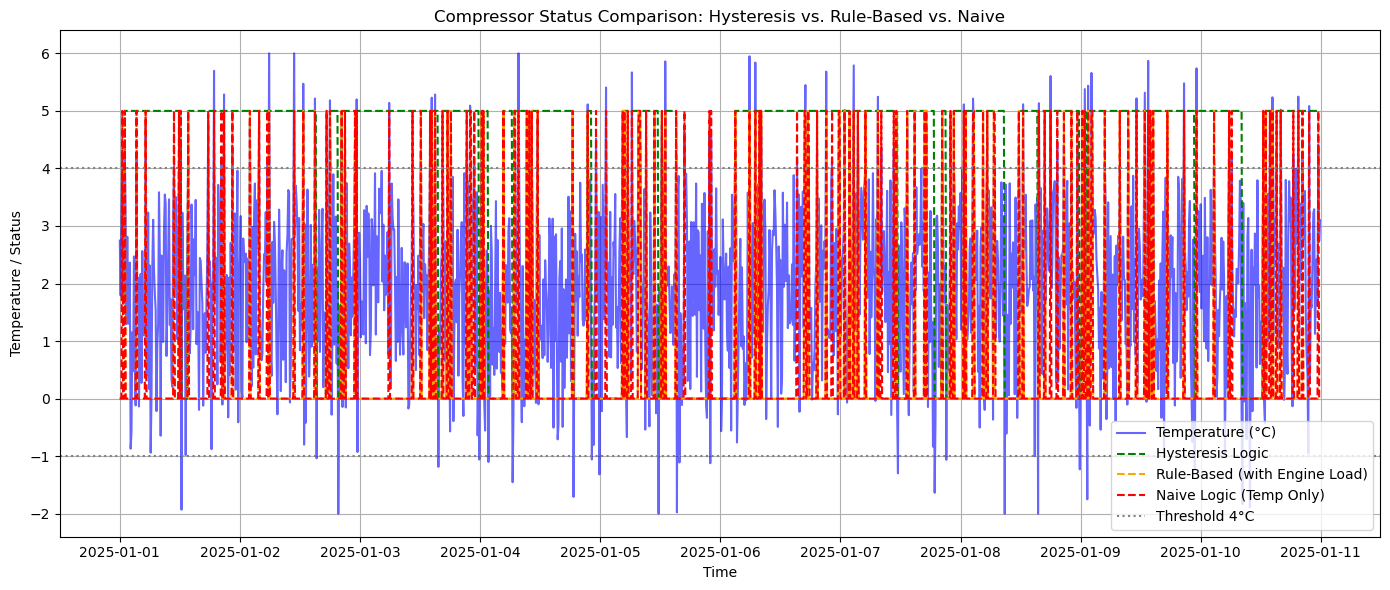

In [79]:
plt.figure(figsize=(14, 6))
plt.plot(df_sim['Timestamp'], df_sim['Temperature'], label='Temperature (°C)', color='blue', alpha=0.6)
plt.plot(df_sim['Timestamp'], df_sim['Hysteresis_Status']*5, label='Hysteresis Logic', linestyle='--', color='green')
plt.plot(df_sim['Timestamp'], df_sim['Rule_Based_Status']*5, label='Rule-Based (with Engine Load)', linestyle='--', color='orange')
plt.plot(df_sim['Timestamp'], df_sim['Naive_Status']*5, label='Naive Logic (Temp Only)', linestyle='--', color='red')
plt.axhline(4, color='gray', linestyle=':', label='Threshold 4°C')
plt.axhline(-1, color='gray', linestyle=':')
plt.xlabel("Time")
plt.ylabel("Temperature / Status")
plt.title("Compressor Status Comparison: Hysteresis vs. Rule-Based vs. Naive")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [81]:
switches_naive = np.sum(np.diff(df_sim['Naive_Status']) != 0)
on_time_naive = df_sim['Naive_Status'].sum() * 10  # 10-minute intervals
hours_naive = on_time_naive / 60

switches_hysteresis = np.sum(np.diff(df_sim['Hysteresis_Status']) != 0)
on_time_hysteresis = df_sim['Hysteresis_Status'].sum() * 10
hours_hysteresis = on_time_hysteresis / 60

switches_rule = np.sum(np.diff(df_sim['Rule_Based_Status']) != 0)
on_time_rule = df_sim['Rule_Based_Status'].sum() * 10
hours_rule = on_time_rule / 60

comparison_metrics = {
    "Compressor ON Time (hrs)": {
        "Hysteresis": hours_hysteresis,
        "Rule-Based": hours_rule,
        "Naive": hours_naive
    },
    "Compressor Switch Count": {
        "Hysteresis": switches_hysteresis,
        "Rule-Based": switches_rule,
        "Naive": switches_naive
    }
}
comparison_metrics


{'Compressor ON Time (hrs)': {'Hysteresis': 196.66666666666666,
  'Rule-Based': 19.166666666666668,
  'Naive': 24.5},
 'Compressor Switch Count': {'Hysteresis': 41,
  'Rule-Based': 218,
  'Naive': 272}}

In [83]:
# Total number of 10-minute intervals when the compressor was ON
compressor_on_intervals = df_sim['Hysteresis_Status'].sum()

# Print result
print(f"Compressor was ON in {compressor_on_intervals} out of {len(df_sim)} intervals.")


Compressor was ON in 1180 out of 1440 intervals.


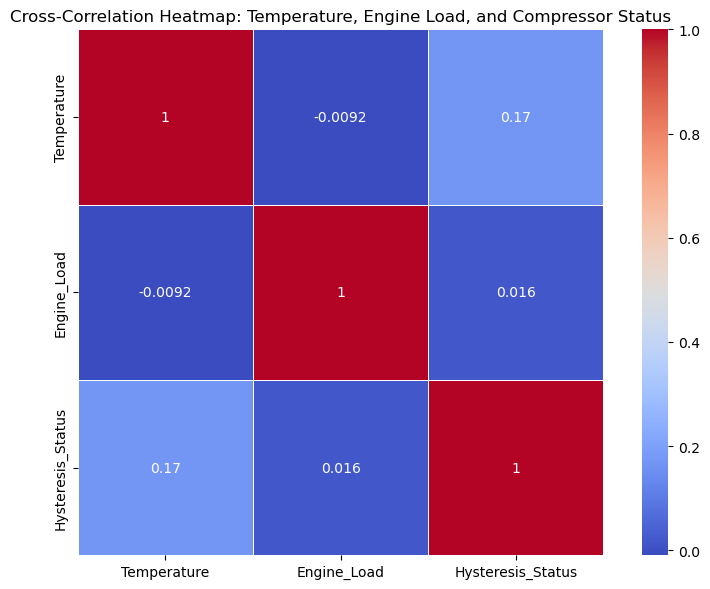

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
corr_data = df_sim[['Temperature', 'Engine_Load', 'Hysteresis_Status']]

# Compute correlation matrix
correlation_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Cross-Correlation Heatmap: Temperature, Engine Load, and Compressor Status")
plt.tight_layout()
plt.show()


In [87]:
total_on_minutes = df_sim['Hysteresis_Status'].sum() * 10  # 10-minute intervals
total_hours = total_on_minutes / 60  # → 205.83 hours

In [89]:
fuel_saved_liters = total_hours * 0.4  # 205.83 * 0.4 = 82.33
fuel_cost_saved = fuel_saved_liters * 430
print(f"Fuel Saved: {fuel_saved_liters:.2f} L")
print(f"Cost Saved: LKR {fuel_cost_saved:.2f}")


Fuel Saved: 78.67 L
Cost Saved: LKR 33826.67


In [91]:
baseline_hours = 240
baseline_fuel = baseline_hours * 0.4
baseline_cost = baseline_fuel * 430

saved_liters = baseline_fuel - fuel_saved_liters
saved_cost = baseline_cost - fuel_cost_saved

print(f"Compared to baseline: {saved_liters:.2f}L fuel saved, LKR {saved_cost:.2f} saved")


Compared to baseline: 17.33L fuel saved, LKR 7453.33 saved


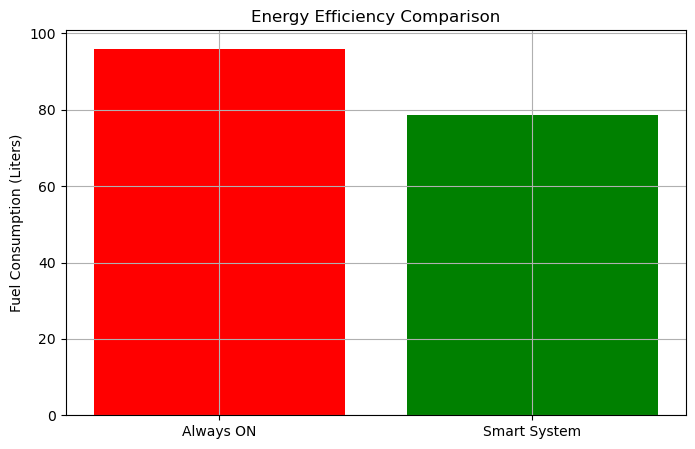

In [93]:
import matplotlib.pyplot as plt

methods = ['Always ON', 'Smart System']
fuel = [baseline_fuel, fuel_saved_liters]

plt.figure(figsize=(8, 5))
plt.bar(methods, fuel, color=['red', 'green'])
plt.ylabel('Fuel Consumption (Liters)')
plt.title('Energy Efficiency Comparison')
plt.grid(True)
plt.show()

In [95]:
df_test = df_sim.copy()
df_test.loc[100:103, 'Temperature'] = 20  # spike for 40 mins

# Re-run hysteresis logic
status_test = []
prev_state = 0
for t, l in zip(df_test['Temperature'], df_test['Engine_Load']):
    state = hysteresis(t, l, prev_state)
    status_test.append(state)
    prev_state = state

df_test['Spiked_Status'] = status_test


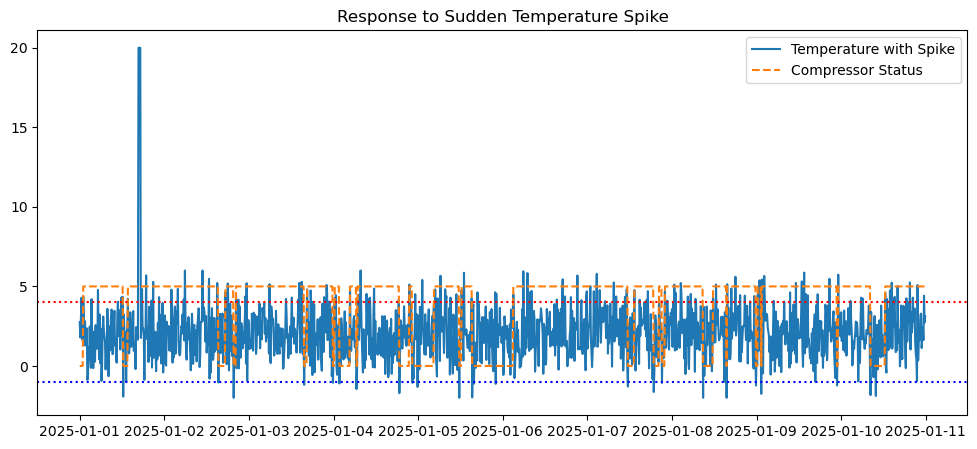

In [97]:
plt.figure(figsize=(12, 5))
plt.plot(df_test['Timestamp'], df_test['Temperature'], label='Temperature with Spike')
plt.plot(df_test['Timestamp'], df_test['Spiked_Status'] * 5, label='Compressor Status', linestyle='--')
plt.axhline(4, color='red', linestyle=':')
plt.axhline(-1, color='blue', linestyle=':')
plt.legend()
plt.title("Response to Sudden Temperature Spike")
plt.show()

In [99]:
noise = np.random.normal(0, 0.5, len(df_sim))  # ±0.5°C noise
df_noise = df_sim.copy()
df_noise['Temp_Noise'] = df_noise['Temperature'] + noise

# Apply hysteresis again
status_noise = []
prev_state = 0
for t, l in zip(df_noise['Temp_Noise'], df_noise['Engine_Load']):
    state = hysteresis(t, l, prev_state)
    status_noise.append(state)
    prev_state = state

df_noise['Noisy_Status'] = status_noise


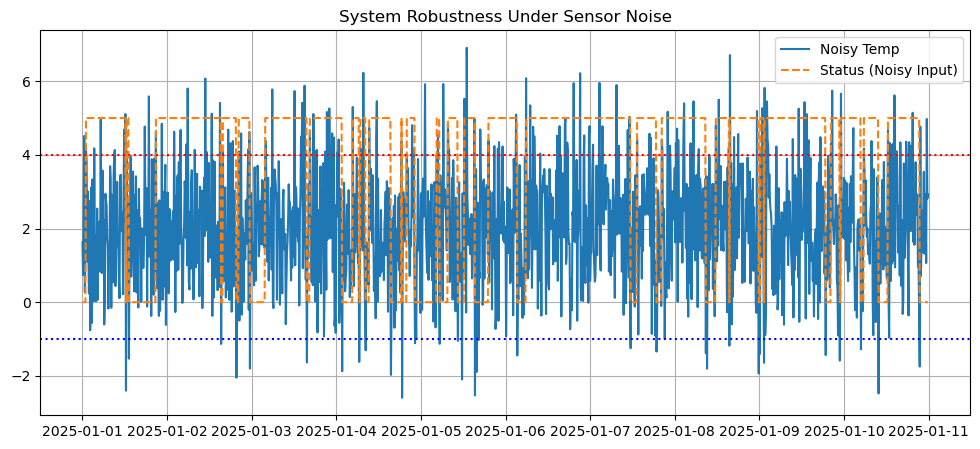

In [111]:
plt.figure(figsize=(12, 5))
plt.plot(df_noise['Timestamp'], df_noise['Temp_Noise'], label='Noisy Temp')
plt.plot(df_noise['Timestamp'], df_noise['Noisy_Status'] * 5, label='Status (Noisy Input)', linestyle='--')
plt.axhline(4, color='red', linestyle=':')
plt.axhline(-1, color='blue', linestyle=':')
plt.legend()
plt.title("System Robustness Under Sensor Noise")
plt.grid(True)
plt.show()